In [1]:
# %% [markdown]
# # Pipeline ▸ compiler01
#
# This notebook keeps the familiar step-by-step structure:
#
# 1. Environment & imports  
# 2. Trap-graph inspection (standard / interaction / idle counts)  
# 3. Run **compiler01** to obtain `positions_history` + `gates_schedule`  
# 4. Verify movement & gate rules  
# 5. Compute fidelity (noise model)  
# 6. Visualise shuttling and gates as a GIF
#
# Change the import path (e.g. `compiler.compiler02`) to try another compiler.

/Users/nd/OS/Code/quantum-hackaton-2025/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
MovieWriter ffmpeg unavailable; using Pillow instead.


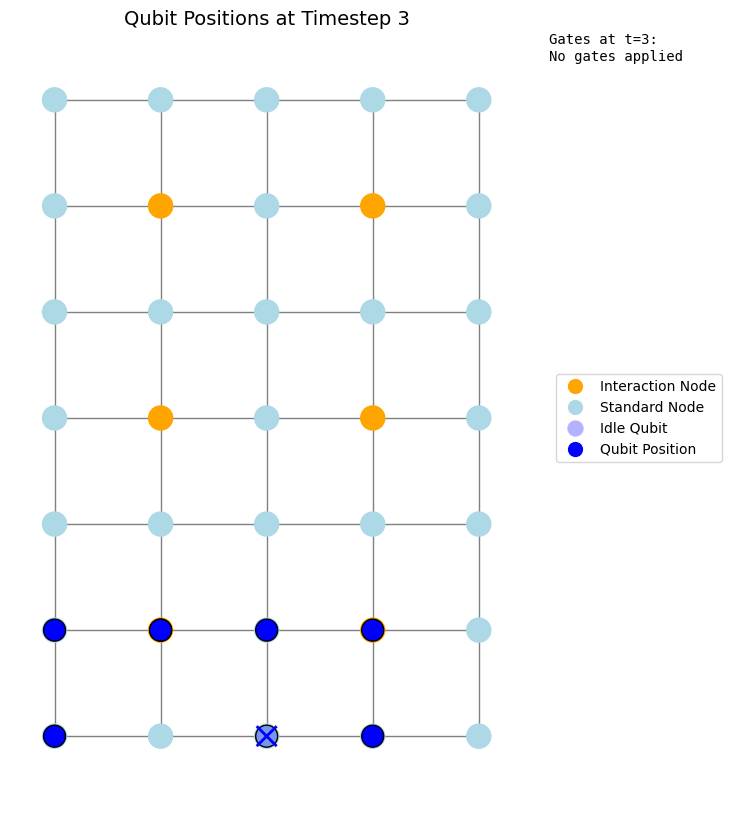

In [2]:
# %% 1 — Environment & imports
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

import networkx as nx
from trap import create_trap_graph
from verifier import verifier
from fidelity import fidelity
from modules import visualization

# Choose which compiler to run
from compiler.compiler01 import compile as run_compiler


In [3]:
# %% 2 — Inspect trap graph (same diagnostic cells as before)
G = create_trap_graph()
print(f"Total nodes   : {G.number_of_nodes()}")
print(f"Total edges   : {G.number_of_edges()}")

standard    = [n for n,d in G.nodes(data=True) if d["type"] == "standard"]
interaction = [n for n,d in G.nodes(data=True) if d["type"] == "interaction"]
idle        = [n for n,d in G.nodes(data=True) if d["type"] == "idle"]

print(f"Standard nodes   : {len(standard)}")
print(f"Interaction nodes: {len(interaction)}")
print(f"Idle nodes       : {len(idle)}")

print("\nNeighbors of first interaction node:")
print(interaction[0], "→", list(G.neighbors(interaction[0])))


Total nodes   : 64
Total edges   : 87
Standard nodes   : 29
Interaction nodes: 6
Idle nodes       : 29

Neighbors of first interaction node:
(1, 1) → [(0, 1), (1, 0), (1, 2), (2, 1)]


In [4]:

# %% 3 — Run compiler01
print("\n=== Running compiler01.compile() ===")
positions_history, gates_schedule = run_compiler()

print(f"Timeline length : {len(positions_history)} steps")
print(f"Non-empty gate-steps :",
      sum(1 for g in gates_schedule if g))



=== Running compiler01.compile() ===
Timeline length : 793 steps
Non-empty gate-steps : 373


In [5]:

# %% 4 — Verify rules
try:
    verifier(positions_history, gates_schedule, G)
except ValueError as e:
    print("\n❌ Verifier failed:")
    raise
print("✅ Verifier passed.")


Verifying the positions history and gates schedule...

❌ Verifier failed:


ValueError: Error: Ions 0 and 1 swapped positions ((0, 1) <-> (1, 1)) at step 3.

In [6]:

# %% 5 — Compute fidelity
fid = fidelity(positions_history, gates_schedule, G)
print(f"\nFidelity (with noise) = {fid:.6f}")


Fidelity of the circuit when including noise: 0.8797380696286682

Fidelity (with noise) = 0.879738


In [ ]:

# %% 6 — Visualise shuttling
gif_name = "compiler01_movement.gif"
visualization.visualize_movement_on_trap(G,
                                         positions_history,
                                         gates_schedule,
                                         outfile=gif_name)

from IPython.display import Image, display
display(Image(filename=gif_name))